In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
# libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import plot_confusion_matrix
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
import os
import pathlib

import tensorflow as tf

from tensorflow import keras
from tensorflow.keras import layers



import scipy.stats as ss
import sklearn
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn import linear_model
from sklearn import model_selection
from sklearn.metrics import classification_report
from sklearn.metrics import precision_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import learning_curve, GridSearchCV
from sklearn.pipeline import Pipeline
from sklearn import preprocessing
from sklearn import tree
from sklearn.naive_bayes import GaussianNB
from mlxtend.plotting import plot_learning_curves
from sklearn.tree import export_graphviz
from six import StringIO
from IPython.display import Image  
import pydotplus
from sklearn.model_selection import validation_curve
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras import callbacks
from keras.models import Sequential
from keras.wrappers.scikit_learn import KerasClassifier
from keras.utils import np_utils
from sklearn.model_selection import KFold
from tensorflow.keras.layers import Dense, Input, Flatten, Dropout, Conv2D, MaxPooling2D, GlobalAveragePooling2D, GlobalMaxPooling2D
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.layers import BatchNormalization

In [3]:
df = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/GR_v10_Tested.csv")

In [ ]:
df.columns.values

array(['survey_region', 'survey_version', 'weight', 'Finished',
       'RecordedDate', 'intro1', 'intro2', 'A1', 'A2_2_1', 'A2_2_2', 'B2',
       'B4', 'V4_2', 'C9', 'E6', 'E5', 'Q_Language', 'Q_TotalDuration',
       'GID_0', 'GID_1', 'ISO_3', 'NAME_0', 'NAME_1', 'country_agg',
       'country_region_numeric', 'region_agg', 'X1w_0unw', 'ISO2',
       'date_from_file', 'date', 'Unnamed..0', 'age', 'B1_1.-77',
       'B1_1.1', 'B1_1.2', 'B1_2.-77', 'B1_2.1', 'B1_2.2', 'B1_3.-77',
       'B1_3.1', 'B1_3.2', 'B1_4.-77', 'B1_4.1', 'B1_4.2', 'B1_5.-77',
       'B1_5.1', 'B1_5.2', 'B1_6.-77', 'B1_6.1', 'B1_6.2', 'B1_7.-77',
       'B1_7.1', 'B1_7.2', 'B1_8.-77', 'B1_8.1', 'B1_8.2', 'B1_9.-77',
       'B1_9.1', 'B1_9.2', 'B1_10.-77', 'B1_10.1', 'B1_10.2', 'B1_11.-77',
       'B1_11.1', 'B1_11.2', 'B1_12.-77', 'B1_12.1', 'B1_12.2',
       'B1_13.-77', 'B1_13.1', 'B1_13.2', 'B1_14.-77', 'B1_14.1',
       'B1_14.2', 'B1b_x1.-99', 'B1b_x1.-77', 'B1b_x1.1', 'B1b_x1.2',
       'B1b_x2.-99', 'B1b_x2

In [ ]:
df.head()

,survey_region,survey_version,weight,Finished,RecordedDate,intro1,intro2,A1,A2_2_1,A2_2_2,B2,B4,V4_2,C9,E6,E5,Q_Language,Q_TotalDuration,GID_0,GID_1,ISO_3,NAME_0,NAME_1,country_agg,country_region_numeric,region_agg,X1w_0unw,ISO2,date_from_file,date,Unnamed..0,age,B1_1.-77,B1_1.1,B1_1.2,B1_2.-77,B1_2.1,B1_2.2,B1_3.-77,B1_3.1,...,D10.3,D10.4,D10.5,D10.6,D10.7,D10.8,D10.9,D10.10,D10.11,D10.12,D10.13,D10.14,D10.15,E3.-99,E3.-77,E3.1,E3.2,E3.3,E3.4,E4.-99,E4.-77,E4.1,E4.2,E4.3,E4.4,E4.5,E4.6,E4.7,E2.-99,E2.-77,E2.1,E2.2,E2.3,E7.-99,E7.-77,E7.1,E7.2,E7.3,E7.4,E7.5
0,EU,10,5933.740672,0,2021-03-02T05:11:44Z,1,1,1,1179,1181,-99.0,-99,NaN,NaN,-99.0,-99.0,EL,597,GRC,GRC.6_1,GRC,Greece,Macedonia and Thrace,Greece,1181,Anatoliki Makedonia Thraki,1,GR,2021-03-02,2021-03-02,NaN,-99,0,0,1,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0
1,EU,10,12506.015409,0,2021-03-02T08:52:06Z,1,1,1,1179,1181,-99.0,-99,NaN,NaN,-99.0,-99.0,EL,698,GRC,GRC.6_1,GRC,Greece,Macedonia and Thrace,Greece,1181,Anatoliki Makedonia Thraki,1,GR,2021-03-02,2021-03-02,NaN,-99,0,0,1,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0
2,EU,10,5296.731086,1,2021-03-02T00:23:37Z,1,1,1,1179,1182,5.0,-99,NaN,NaN,15.0,1.0,EL,1017,GRC,GRC.3_1,GRC,Greece,Attica,Greece,1182,Attiki,1,GR,2021-03-02,2021-03-02,NaN,5,1,0,0,0,1,0,0,1,...,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,1,0,0
3,EU,10,12108.720384,1,2021-03-02T00:22:43Z,1,1,1,1179,1182,-99.0,-99,NaN,NaN,16.0,1.0,EN-GB,845,GRC,GRC.3_1,GRC,Greece,Attica,Greece,1182,Attiki,1,GR,2021-03-02,2021-03-02,NaN,7,0,0,1,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,1,0,0,0,0
4,EU,10,4943.455778,1,2021-03-02T00:26:15Z,1,1,1,1179,1182,-99.0,-99,NaN,NaN,3.0,3.0,EL,957,GRC,GRC.3_1,GRC,Greece,Attica,Greece,1182,Attiki,1,GR,2021-03-02,2021-03-02,NaN,5,0,0,1,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,1,0,0,0


In [ ]:
df.tail()

,survey_region,survey_version,weight,Finished,RecordedDate,intro1,intro2,A1,A2_2_1,A2_2_2,B2,B4,V4_2,C9,E6,E5,Q_Language,Q_TotalDuration,GID_0,GID_1,ISO_3,NAME_0,NAME_1,country_agg,country_region_numeric,region_agg,X1w_0unw,ISO2,date_from_file,date,Unnamed..0,age,B1_1.-77,B1_1.1,B1_1.2,B1_2.-77,B1_2.1,B1_2.2,B1_3.-77,B1_3.1,...,D10.3,D10.4,D10.5,D10.6,D10.7,D10.8,D10.9,D10.10,D10.11,D10.12,D10.13,D10.14,D10.15,E3.-99,E3.-77,E3.1,E3.2,E3.3,E3.4,E4.-99,E4.-77,E4.1,E4.2,E4.3,E4.4,E4.5,E4.6,E4.7,E2.-99,E2.-77,E2.1,E2.2,E2.3,E7.-99,E7.-77,E7.1,E7.2,E7.3,E7.4,E7.5
17709,EU,10,18401.936658,1,2021-05-17T00:25:44Z,1,1,1,1179,1193,-99.0,-99,NaN,NaN,4.0,3.0,EL,602,GRC,GRC.1_1,GRC,Greece,Aegean,Greece,1193,Voreio Aigaio,1,GR,2021-05-17,2021-05-17,NaN,2,0,0,1,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0
17710,EU,10,6443.086421,1,2021-05-17T08:43:23Z,1,1,1,1179,1193,-99.0,-99,NaN,NaN,18.0,3.0,EN,434,GRC,GRC.1_1,GRC,Greece,Aegean,Greece,1193,Voreio Aigaio,1,GR,2021-05-17,2021-05-17,NaN,1,0,0,1,0,0,1,0,0,...,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0
17711,EU,10,7592.378865,1,2021-05-17T00:13:43Z,1,1,1,1179,1193,-99.0,-99,NaN,NaN,15.0,0.0,EL,430,GRC,GRC.1_1,GRC,Greece,Aegean,Greece,1193,Voreio Aigaio,1,GR,2021-05-17,2021-05-17,NaN,4,0,0,1,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0
17712,EU,10,7017.825984,1,2021-05-17T03:32:07Z,1,1,1,1179,1193,-99.0,-99,NaN,NaN,18.0,3.0,EL,391,GRC,GRC.1_1,GRC,Greece,Aegean,Greece,1193,Voreio Aigaio,1,GR,2021-05-17,2021-05-17,NaN,3,0,0,1,0,0,1,0,0,...,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0
17713,EU,10,10288.469859,1,2021-05-17T01:28:27Z,1,1,1,1179,1193,3.0,3,NaN,NaN,15.0,2.0,EL,360,GRC,GRC.1_1,GRC,Greece,Aegean,Greece,1193,Voreio Aigaio,1,GR,2021-05-17,2021-05-17,NaN,1,0,0,1,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0


In [ ]:
df.shape

(17714, 735)

# Creating our dataframe

In [4]:
df_ok = df[['B1_1.1','B1_2.1','B1_3.1','B1_4.1','B1_5.1','B1_6.1','B1_7.1','B1_8.1','B1_9.1','B1_10.1','B1_11.1','B1_12.1','B1_13.1','B1_14.1','B8.1']]

In [5]:
df_ok.shape

(17714, 15)

In [ ]:
df_ok.head()

,B1_1.1,B1_2.1,B1_3.1,B1_4.1,B1_5.1,B1_6.1,B1_7.1,B1_8.1,B1_9.1,B1_10.1,B1_11.1,B1_12.1,B1_13.1,B1_14.1,B8.1
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,0,1,1,0,0,0,0,0,0,0,0,0,0,0,1
3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [ ]:
df_ok.tail()

,B1_1.1,B1_2.1,B1_3.1,B1_4.1,B1_5.1,B1_6.1,B1_7.1,B1_8.1,B1_9.1,B1_10.1,B1_11.1,B1_12.1,B1_13.1,B1_14.1,B8.1
17709,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
17710,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
17711,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
17712,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
17713,0,0,0,0,1,0,1,0,0,0,0,1,0,0,0


# Data Visualization

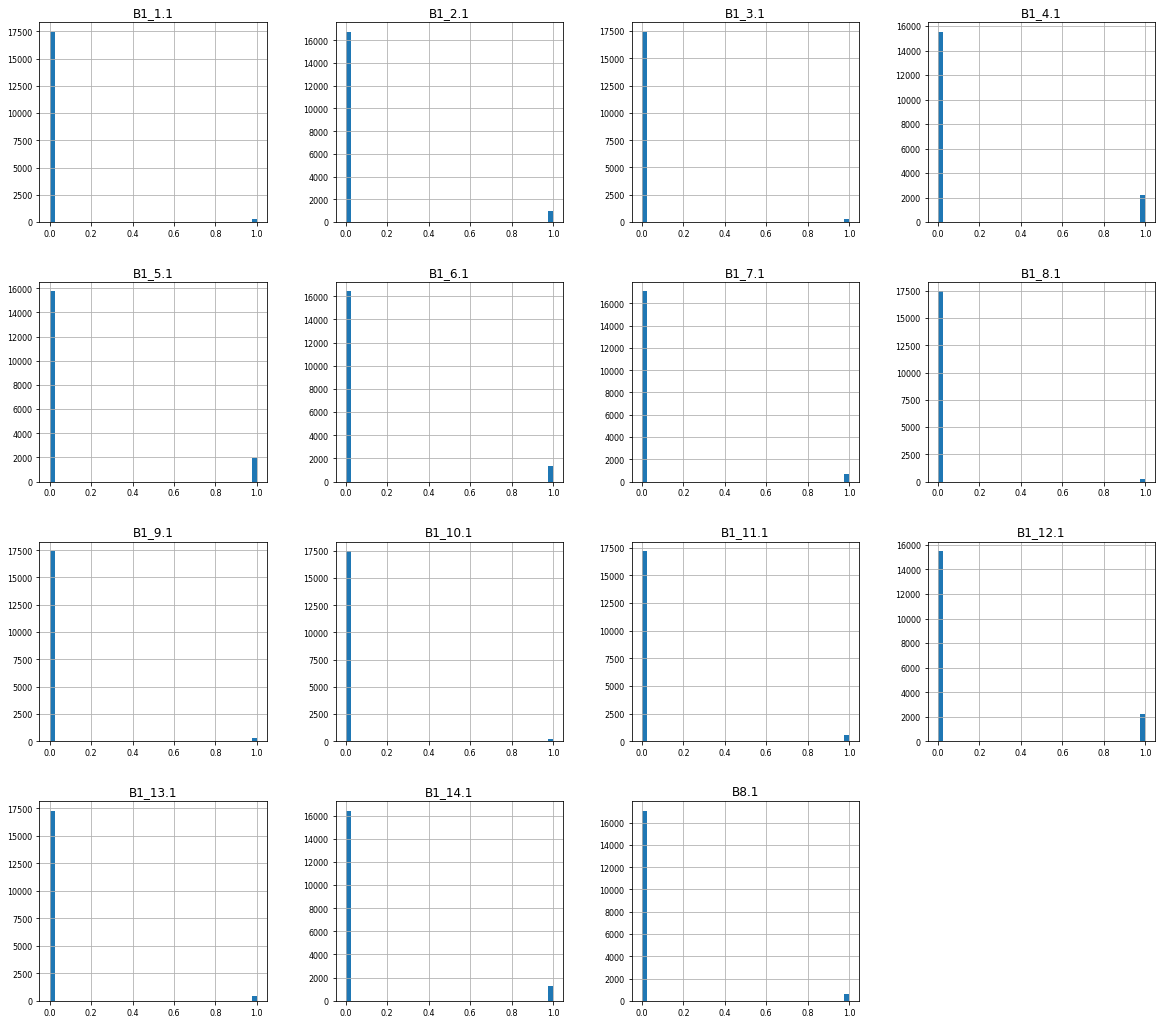

In [ ]:
df_ok.hist(figsize=(20, 18), bins=40, xlabelsize=8, ylabelsize=8, )
plt.show()

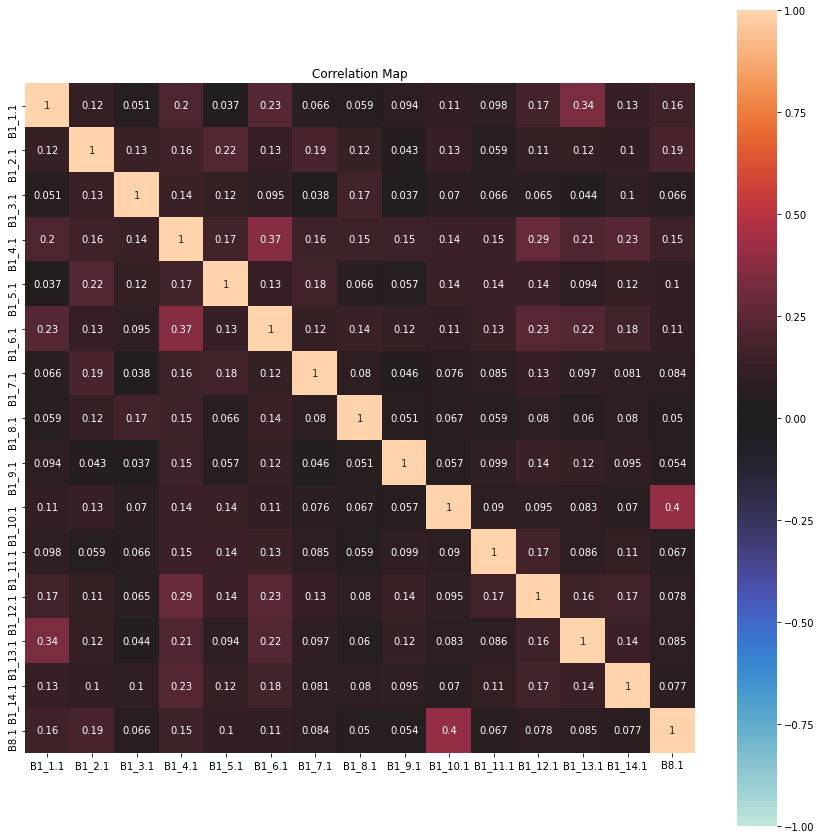

In [ ]:
f, ax = plt.subplots(figsize=(15, 15))
corr = df_ok.corr()
sns.heatmap(corr,annot=True, vmin = -1, vmax = 1, square = True, center =0, 
            xticklabels=corr.columns.values,
            yticklabels=corr.columns.values)
plt.title('Correlation Map')
plt.show()

### Output

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fbc95c54110>]],
      dtype=object)

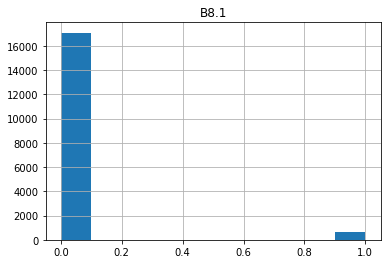

In [ ]:
df_ok.hist('B8.1')

In [ ]:
freq = df_ok.groupby(['B8.1']).count()
freq

,B1_1.1,B1_2.1,B1_3.1,B1_4.1,B1_5.1,B1_6.1,B1_7.1,B1_8.1,B1_9.1,B1_10.1,B1_11.1,B1_12.1,B1_13.1,B1_14.1
B8.1,,,,,,,,,,,,,,
0,17087,17087,17087,17087,17087,17087,17087,17087,17087,17087,17087,17087,17087,17087
1,627,627,627,627,627,627,627,627,627,627,627,627,627,627


Positive in the last 14 days -> 627

Negative in the last 14 days -> 17087

# Training & Test

In [6]:
X = df_ok.drop(['B8.1'], axis=1)
Y = df_ok['B8.1']

In [7]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2, random_state=2)


In [8]:
print(X_train.shape)
print(X_test.shape)
print(Y_train.shape)
print(Y_test.shape)

(14171, 14)
(3543, 14)
(14171,)
(3543,)


In [ ]:
'''
X_norm = preprocessing.scale(X_train)
scaler = preprocessing.StandardScaler().fit(X_train)
X_train_norm = scaler.transform(X_train)
X_test_norm = scaler.transform(X_test)
print(X_train_norm.shape)
print(X_test_norm.shape)
'''

## Decision Tree

In [9]:
max_depth = np.arange(1, 10)
min_samples_leaf = [50, 100, 200]

# GridSearchCV
param_grid = { 'criterion':['gini','entropy'],'max_depth': max_depth,'min_samples_leaf': min_samples_leaf}

In [10]:
dtree_model=tree.DecisionTreeClassifier()

dtree_model = GridSearchCV(dtree_model, param_grid, cv=3)

dtree_model=dtree_model.fit(X_train, Y_train)
print(dtree_model.best_params_)


{'criterion': 'gini', 'max_depth': 1, 'min_samples_leaf': 50}


Accuracy: 0.9709285915890489
              precision    recall  f1-score   support

           0       0.97      1.00      0.99      3425
           1       0.67      0.25      0.36       118

    accuracy                           0.97      3543
   macro avg       0.82      0.62      0.67      3543
weighted avg       0.96      0.97      0.96      3543

[[3411   14]
 [  89   29]]


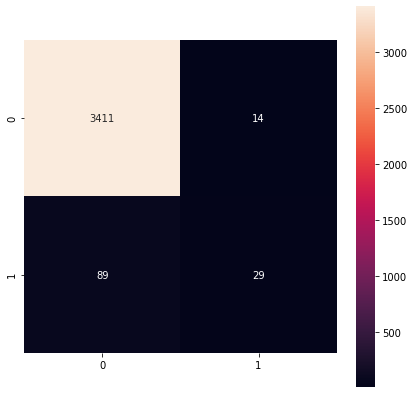

In [11]:
my_model = dtree_model.best_estimator_
my_tree=my_model.fit(X_train, Y_train)

y_predicted = my_model.predict(X_test)

print('Accuracy:',accuracy_score(Y_test, y_predicted))
print(classification_report(Y_test, y_predicted))
matrix = confusion_matrix(Y_test, y_predicted)
print(matrix)
plt.figure(figsize=(7,7))
sns.heatmap(matrix,annot=True, square = True, fmt='g')
plt.show()
#print(confusion_matrix(Y_test, y_predicted))


In [12]:
my_tree.get_depth()
my_tree.get_params()

{'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': 1,
 'max_features': None,
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_impurity_split': None,
 'min_samples_leaf': 50,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'presort': 'deprecated',
 'random_state': None,
 'splitter': 'best'}

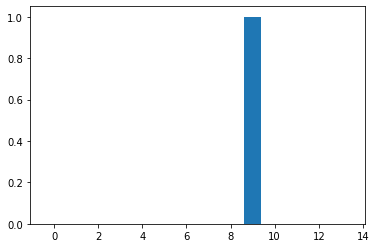

In [13]:
from matplotlib import pyplot
importance=my_tree.feature_importances_
pyplot.bar([x for x in range(len(importance))], importance)
pyplot.show()

## Random Forest

In [14]:
rfc=RandomForestClassifier(random_state=42)

In [15]:
param_grid = { 
    'n_estimators': [200, 500],
    'max_features': ['auto', 'sqrt', 'log2'],
    'max_depth' : [4,5,6,7,8],
    'criterion' :['gini', 'entropy']
}

In [16]:
CV_rfc = GridSearchCV(estimator=rfc, param_grid=param_grid, cv= 3)
CV_rfc.fit(X_train, Y_train)

GridSearchCV(cv=3, error_score=nan,
             estimator=RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
                                              class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              max_samples=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators=100, n_jobs=None,
                                              oob_score=False, random_state=42,
                                  

In [17]:
CV_rfc.best_params_

{'criterion': 'entropy',
 'max_depth': 8,
 'max_features': 'auto',
 'n_estimators': 500}

In [18]:
my_model = CV_rfc.best_estimator_
RF =my_model.fit(X_train, Y_train)


In [19]:
y_pred = RF.predict(X_test)

Accuracy: 0.96923511148744
              precision    recall  f1-score   support

           0       0.97      1.00      0.98      3425
           1       0.61      0.21      0.31       118

    accuracy                           0.97      3543
   macro avg       0.79      0.60      0.65      3543
weighted avg       0.96      0.97      0.96      3543

[[3409   16]
 [  93   25]]


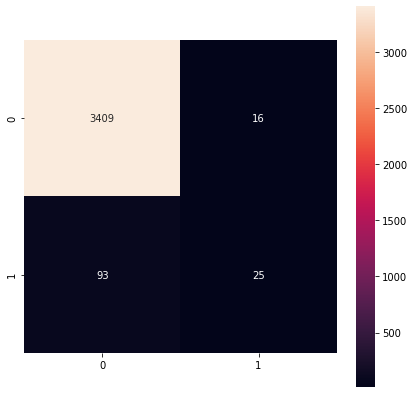

In [20]:
print('Accuracy:',accuracy_score(Y_test, y_pred))
print(classification_report(Y_test, y_pred))
matrix = confusion_matrix(Y_test, y_pred)
print(matrix)
plt.figure(figsize=(7,7))
sns.heatmap(matrix,annot=True, square = True, fmt='g')
plt.show()
#print(confusion_matrix(Y_test, y_pred))

## KNN

In [21]:
k_values = range(1,51,2)
param_grid = {'n_neighbors': k_values}

kNN_model=KNeighborsClassifier()

grid = GridSearchCV(kNN_model, param_grid, cv = 3, scoring = 'accuracy')
grid.fit(X_train,Y_train)
print(grid.best_params_)

{'n_neighbors': 3}


In [22]:
my_model = grid.best_estimator_

Accuracy: 0.9669771380186283
              precision    recall  f1-score   support

           0       0.97      1.00      0.98      3425
           1       0.52      0.13      0.20       118

    accuracy                           0.97      3543
   macro avg       0.74      0.56      0.59      3543
weighted avg       0.96      0.97      0.96      3543

[[3411   14]
 [ 103   15]]


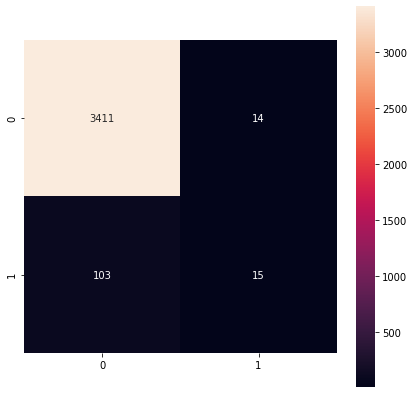

In [23]:
my_model.fit(X_train, Y_train)
y_predicted = my_model.predict(X_test)
print('Accuracy:',accuracy_score(Y_test, y_predicted))
print(classification_report(Y_test, y_predicted))

matrix = confusion_matrix(Y_test, y_predicted)
print(matrix)
plt.figure(figsize=(7,7))
sns.heatmap(matrix,annot=True, square = True, fmt='g')
plt.show()


## SVM

In [24]:
# defining parameter range
param_grid = {'C': [0.1, 1, 10, 100, 1000], 
              'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
              'kernel': ['rbf']} 
  
grid = GridSearchCV(SVC(), param_grid, refit = True)
  
# fitting the model for grid search
grid.fit(X_train, Y_train)

GridSearchCV(cv=None, error_score=nan,
             estimator=SVC(C=1.0, break_ties=False, cache_size=200,
                           class_weight=None, coef0=0.0,
                           decision_function_shape='ovr', degree=3,
                           gamma='scale', kernel='rbf', max_iter=-1,
                           probability=False, random_state=None, shrinking=True,
                           tol=0.001, verbose=False),
             iid='deprecated', n_jobs=None,
             param_grid={'C': [0.1, 1, 10, 100, 1000],
                         'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
                         'kernel': ['rbf']},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=0)

In [25]:
# print best parameter after tuning
print(grid.best_params_)
  
# print how our model looks after hyper-parameter tuning
print(grid.best_estimator_)

{'C': 1, 'gamma': 0.1, 'kernel': 'rbf'}
SVC(C=1, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma=0.1, kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)


Accuracy: 0.9709285915890489
              precision    recall  f1-score   support

           0       0.97      1.00      0.99      3425
           1       0.67      0.25      0.36       118

    accuracy                           0.97      3543
   macro avg       0.82      0.62      0.67      3543
weighted avg       0.96      0.97      0.96      3543

[[3411   14]
 [  89   29]]


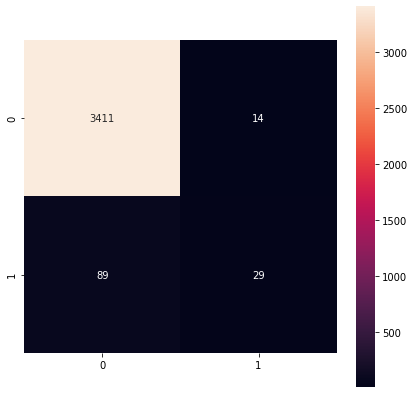

In [26]:
y_pred = grid.predict(X_test)
  
# print classification report
print('Accuracy:',accuracy_score(Y_test, y_pred))
print(classification_report(Y_test, y_pred))

matrix = confusion_matrix(Y_test, y_pred)
print(matrix)
plt.figure(figsize=(7,7))
sns.heatmap(matrix,annot=True, square = True, fmt='g')
plt.show()

## Neural Network

In [27]:
neg, pos = np.bincount(df_ok['B8.1'])
total = neg + pos
print('Examples:\n    Total: {}\n    Positive: {} ({:.2f}% of total)\n'.format(
    total, pos, 100 * pos / total))

Examples:
    Total: 17714
    Positive: 627 (3.54% of total)



In [28]:
weight_for_0 = (1 / neg) * (total / 2.0)
weight_for_1 = (1 / pos) * (total / 2.0)

class_weight = {0: weight_for_0, 1: weight_for_1}

print('Weight for class 0: {:.2f}'.format(weight_for_0))
print('Weight for class 1: {:.2f}'.format(weight_for_1))

Weight for class 0: 0.52
Weight for class 1: 14.13


In [29]:
def baseline_model():
  model = Sequential()
  model.add(Dense(2000, input_dim=X_train.shape[1], activation='relu'))
  model.add(BatchNormalization())
  model.add(Dropout(0.3))
  model.add(Dense(1024, activation='relu'))
  model.add(Dropout(0.4))
  model.add(Dense(512, activation='relu'))
  model.add(Dropout(0.5))
  model.add(Dense(256, activation='relu'))
  model.add(Dropout(0.5))
  model.add(Dense(128, activation='relu'))
  model.add(Dropout(0.5))
  model.add(Dense(64, activation='relu')),
  model.add(Dropout(0.5)),
  model.add(Dense(1, activation='sigmoid'))
  # Compile model
  model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['binary_accuracy'])
  return model

In [34]:
model = baseline_model()

history = model.fit(
  X_train, Y_train, batch_size = 512,
  epochs=50, validation_split = 0.1,
  class_weight=class_weight)

Epoch 1/50
25/25 [==============================] - 2s 22ms/step - loss: 1.0198 - binary_accuracy: 0.5849 - val_loss: 0.6965 - val_binary_accuracy: 0.0712
Epoch 2/50
25/25 [==============================] - 0s 6ms/step - loss: 0.8983 - binary_accuracy: 0.6032 - val_loss: 0.6893 - val_binary_accuracy: 0.9535
Epoch 3/50
25/25 [==============================] - 0s 6ms/step - loss: 0.6884 - binary_accuracy: 0.6181 - val_loss: 0.6794 - val_binary_accuracy: 0.9669
Epoch 4/50
25/25 [==============================] - 0s 6ms/step - loss: 0.6695 - binary_accuracy: 0.7034 - val_loss: 0.6765 - val_binary_accuracy: 0.9591
Epoch 5/50
25/25 [==============================] - 0s 6ms/step - loss: 0.6309 - binary_accuracy: 0.7136 - val_loss: 0.6679 - val_binary_accuracy: 0.9669
Epoch 6/50
25/25 [==============================] - 0s 6ms/step - loss: 0.6147 - binary_accuracy: 0.7145 - val_loss: 0.6602 - val_binary_accuracy: 0.9661
Epoch 7/50
25/25 [==============================] - 0s 6ms/step - loss: 0.6

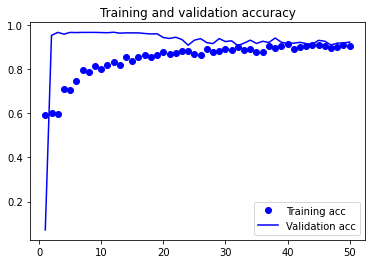

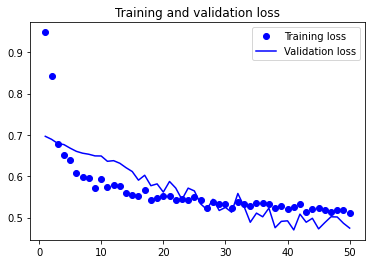

In [35]:
acc = history.history['binary_accuracy']
val_acc = history.history['val_binary_accuracy'] 
loss = history.history['loss'] 
val_loss = history.history['val_loss']
epochs = range(1, len(acc) + 1)
plt.plot(epochs, acc, 'bo', label='Training acc') 
plt.plot(epochs, val_acc, 'b', label='Validation acc') 
plt.title('Training and validation accuracy') 
plt.legend()
plt.figure()
plt.plot(epochs, loss, 'bo', label='Training loss') 
plt.plot(epochs, val_loss, 'b', label='Validation loss') 
plt.title('Training and validation loss')
plt.legend()
plt.show()

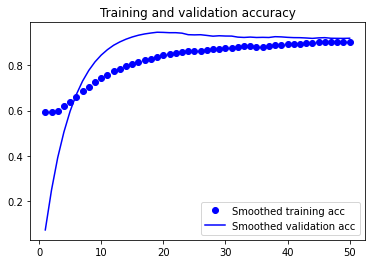

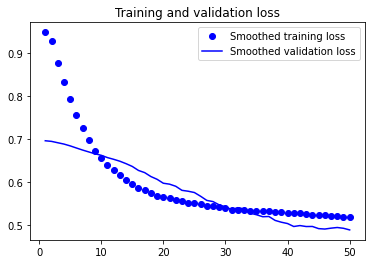

In [36]:
def smooth_curve(points, factor=0.8): 
  smoothed_points = []
  for point in points:
      if smoothed_points:
          previous = smoothed_points[-1]
          smoothed_points.append(previous * factor + point * (1 - factor))
      else: 
          smoothed_points.append(point)
  return smoothed_points
plt.plot(epochs,
         smooth_curve(acc), 'bo', label='Smoothed training acc')
plt.plot(epochs,
         smooth_curve(val_acc), 'b', label='Smoothed validation acc')
plt.title('Training and validation accuracy') 
plt.legend()
plt.figure()
plt.plot(epochs,
         smooth_curve(loss), 'bo', label='Smoothed training loss')
plt.plot(epochs,
         smooth_curve(val_loss), 'b', label='Smoothed validation loss')
plt.title('Training and validation loss') 
plt.legend()
plt.show()

In [37]:
model.evaluate(X_test, Y_test)

111/111 [==============================] - 0s 2ms/step - loss: 0.4687 - binary_accuracy: 0.9294


[0.46873316168785095, 0.9294383525848389]

[[3425    0]
 [ 118    0]]


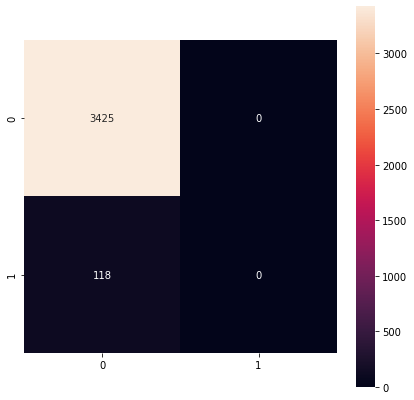

In [38]:
y_pred = model.predict(X_test)
matrix = confusion_matrix(Y_test, y_pred.argmax(axis=1))
print(matrix)
plt.figure(figsize=(7,7))
sns.heatmap(matrix,annot=True, square = True, fmt='g')
plt.show()